# <a id='toc1_'></a>[Topic 16: Frequency Response Methods](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Topic 16: Frequency Response Methods](#toc1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy.polynomial.polynomial import polyval
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

from control.matlab import tf, lsim


Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found


In [2]:
# define interesting system
G = 10*tf([1,1],[1, .2, 10]) 
w = np.append(0,np.logspace(-1,2,1000))
omega = [1,4,30]

Tf = 50
t = np.linspace(0,Tf,Tf*100)
y_pred = np.zeros((len(t),len(omega)))
y_sim = np.copy(y_pred)
U = np.copy(y_pred)
for kk,ww in enumerate(omega):
    u = np.sin(ww*t)
    U[:,kk] = u
    Gf = G(j*ww)
    y_pred[:,kk] = np.abs(Gf)*np.sin(ww*t + np.angle(Gf))
    y,_,_ = lsim(G,u,t)
    y_sim[:,kk] = y


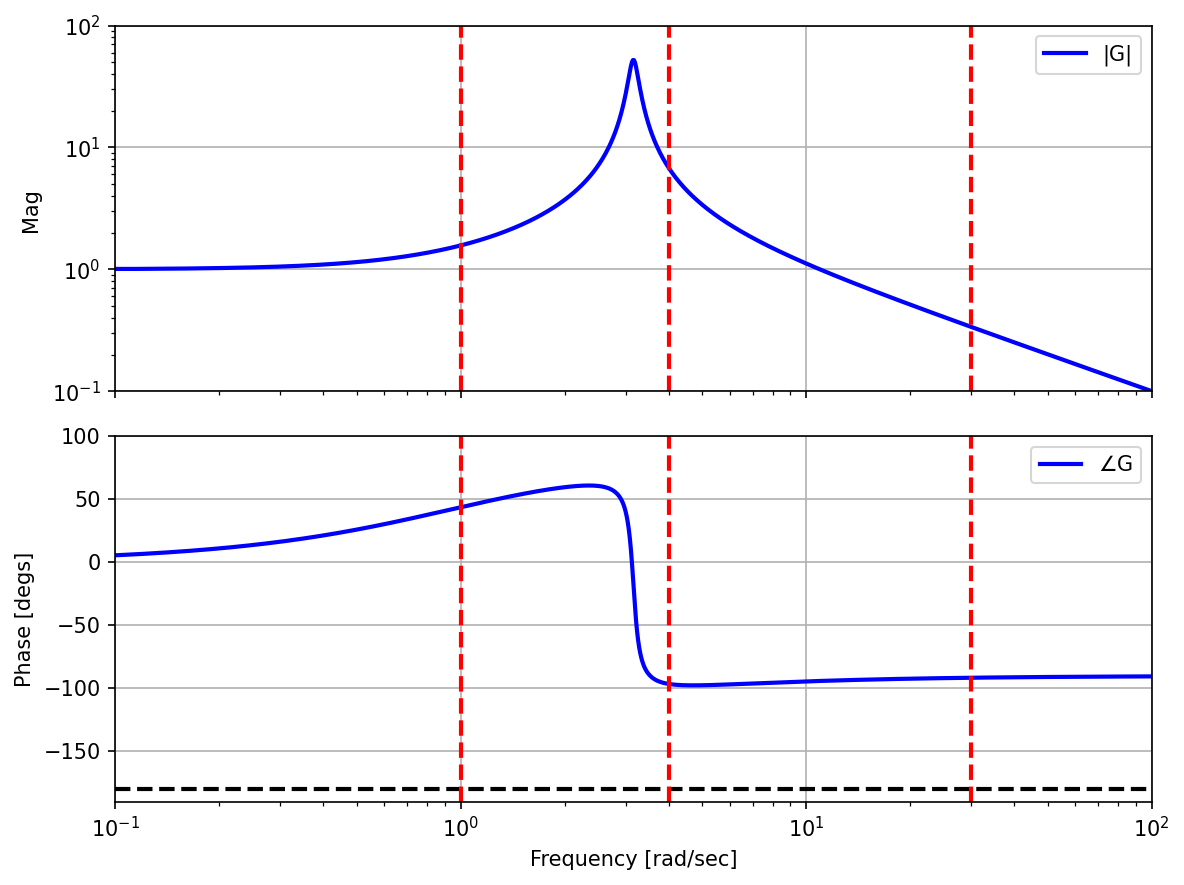

In [3]:
Gf = G(j*w)

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(w,np.abs(Gf),'b-',label='|G|')
ax[0].legend()
ax[0].set_ylim([.1,100])
ax[0].set_ylabel("Mag ")

ax[1].semilogx(w,np.angle(Gf)*r2d,'b-',label=r'$\angle$G')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylim([-190,100])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")
for kk,ww in enumerate(omega):
    ax[0].axvline(x=ww,c='r',ls="--")
    ax[1].axvline(x=ww,c='r',ls="--")

plt.legend()
savefig("./figs/L14_FRF1.pdf", dpi=600)
plt.show()

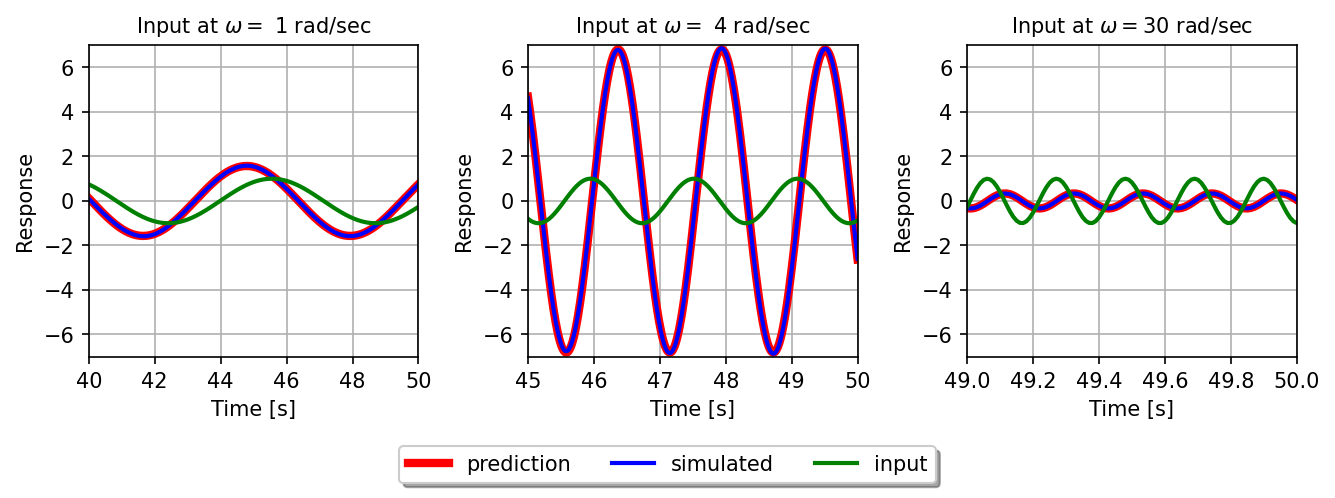

In [4]:
fig, ax = plt.subplots(1,3,figsize=(9, 3),dpi=150)
for kk,ww in enumerate(omega):
    line1, =ax[kk].plot(t,y_pred[:,kk],'r-',lw=4,label='prediction')
    line2, =ax[kk].plot(t,y_sim[:,kk],'b-',label='simulated')
    line3, =ax[kk].plot(t,U[:,kk],'g-',label='input')
    ax[kk].set_xlabel("Time [s]")
    ax[kk].set_ylabel("Response")
    ax[kk].set_ylim([-7,7])
    ax[kk].set_title(r'Input at $\omega=${:2.0f} rad/sec'.format(ww))
#ax[1].legend(fontsize=6,loc='lower center', bbox_to_anchor=(0.5, -.5),ncol=3, fancybox=True, shadow=True)
ax[0].set_xlim([max(t)-10,max(t)])
ax[1].set_xlim([max(t)-5,max(t)])
ax[2].set_xlim([max(t)-1,max(t)])
fig.legend([line1, line2, line3], ['prediction', 'simulated','input'], bbox_to_anchor=[0.5, -0.05], 
           loc='center', ncol=3, fancybox=True, shadow=True)
savefig("./figs/L14_FRF2.pdf", dpi=600)
plt.show()

In [5]:
#!pip install ipympl
import ipywidgets as widgets
from mpl_toolkits.mplot3d import axes3d
from ipywidgets import AppLayout, FloatSlider
%matplotlib widget
plt.ioff()

In [6]:
slider = FloatSlider(
    orientation='horizontal',
    description='Frequency:',
    value=1.0,
    min=1,
    max=30
)

slider.layout.margin = '0px 10% 0px 30%'
slider.layout.width = '50%'

Tf = 50
t = np.linspace(0,Tf+20,Tf*100)

fig, ax = plt.subplots(3, 1, figsize=(6, 6), dpi=150)
fig.canvas.header_visible = False

ax[0].loglog(w,np.abs(Gf),'b-',label='|G|')
ax[0].legend()
ax[0].set_ylim([.1,100])
ax[0].set_ylabel("Mag ")

ax[1].semilogx(w,np.angle(Gf)*r2d,'b-',label=r'$\angle$G')
ax[1].axhline(y=-180,c='k',ls="--")
ax[1].legend()
ax[1].set_xlim([min(w),max(w)])
ax[1].set_ylim([-190,100])
ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")

ax[2].set_title('Response to u = sin({:2.1f} t)'.format(slider.value))
ax[2].set_xlabel("Time [s]")
ax[2].set_ylabel("Response")
ax[2].set_xlim([20,20+Tf])

lines0 = ax[0].loglog([slider.value,slider.value],[.1,100],c='r',ls="--")
lines1 = ax[1].semilogx([slider.value,slider.value],[-180,100],c='r',ls="--")
linesr = ax[2].plot(t, np.sin(slider.value * t),'r-',lw=4)
linesb = ax[2].plot(t, np.sin(slider.value * t),'b-')
linesg = ax[2].plot(t, np.sin(slider.value * t),'g-')
def update_lines2(change):
    t = np.linspace(0,Tf+20,int(1000+slider.value/10*5000))
    ax[2].set_title(r'Input at $\omega=${:2.1f} rad/sec'.format(slider.value))
    lines0[0].set_data([change.new,change.new],[.1,100])
    lines1[0].set_data([change.new,change.new],[-180,100])
    linesr[0].set_data(t, np.abs(G(j*change.new))*np.sin(change.new*t + np.angle(G(j*change.new))))
    linesb[0].set_data(t, lsim(G,np.sin(change.new*t),t)[0])
    linesg[0].set_data(t, np.sin(change.new*t))
    gain = 2 + int(np.abs(G(j*change.new)))
    ax[2].set_ylim([-gain,gain])
    ax[2].set_xlim([20,20+int(Tf/slider.value)])
    ax[2].legend([linesr[0], linesb[0], linesg[0]], ['prediction', 'simulated','input'], bbox_to_anchor=[0.5, -0.5], 
           loc='center', ncol=3, fancybox=True, shadow=True)
    fig.canvas.draw()
    fig.canvas.flush_events()

slider.observe(update_lines2, names='value')

AppLayout(
    center=fig.canvas,
    footer=slider,
    pane_heights=[0, 6, 1]
)



AppLayout(children=(FloatSlider(value=1.0, description='Frequency:', layout=Layout(grid_area='footer', margin=…